### **Marketing Campaign Response Prediction using Keras**

The model is trying to predict whether a given subject will accept the offer in the marketing campaign.

**Variables:**

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase

Dataset link: [Marketing_campaign_responce](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign)

**Import libraries and packages**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_column', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf


**Import dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Marketing_Campaign_Response_Prediction_using_Keras/marketing_campaign.csv', delimiter=';')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Overview of the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Check if there are null values.
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Check percentage of null values.
((data.isna().sum())/len(data))*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

**Preprocessing initial analysis**

**Check the remaining categorical values.**

In [ ]:
# Check how many unique values there are for Marital status.
len(data['Marital_Status'].unique())

8

In [ ]:
# Check distinct values.
(data['Marital_Status'].unique())

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
# Check how many unique values there are for Education.
len(data['Education'].unique())

5

In [ ]:
# Check distinct values.
(data['Education'].unique())

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
# Check to see if there are anymore categorical variables.
data.select_dtypes('object')

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,2012-09-04
1,Graduation,Single,2014-03-08
2,Graduation,Together,2013-08-21
3,Graduation,Together,2014-02-10
4,PhD,Married,2014-01-19
...,...,...,...
2235,Graduation,Married,2013-06-13
2236,PhD,Together,2014-06-10
2237,Graduation,Divorced,2014-01-25
2238,Master,Together,2014-01-24


**Preprocessing final functions**

In [ ]:
# Define one-hot encoding function.

def onehot_encode(df, column):
    df=df.copy()
    dummies=pd.get_dummies(df[column], prefix=column)
    df=pd.concat([df, dummies], axis=1)
    df=df.drop(column, axis=1)
    return df

In [ ]:
# Preprocessing pipeline

def preprocess_inputs(df):
    df=df.copy()

    # Drop ID column
    df=df.drop('ID', axis=1)

    # Fill missing Income values with mean.
    df['Income']=df['Income'].fillna(df['Income'].mean())

    # Extract year, month, day from time id.
    df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
    df['Year_Customer']=df['Dt_Customer'].apply(lambda x: x.year)
    df['Month_Customer']=df['Dt_Customer'].apply(lambda x: x.month)
    df['Day_Customer']=df['Dt_Customer'].apply(lambda x: x.day)
    df=df.drop('Dt_Customer', axis=1)

    # One-hot encoding
    for column in ['Education','Marital_Status']:
        df=onehot_encode(df, column=column)

    # Split the dataset into features and target.
    X=df.drop('Response', axis=1)
    y=df['Response']

    # Train-test split
    X_train,X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale feature dataset
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train=pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test=pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


    return X_train,X_test, y_train, y_test

In [ ]:
X_train,X_test, y_train, y_test=preprocess_inputs(data)


In [ ]:
X_train.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1747,-1.913598,0.666182,-0.818551,-0.928565,-0.943047,0.940445,-0.000399,0.118913,-0.058848,-0.242557,1.899016,-0.670921,0.670017,0.444401,2.197888,-1.327203,-0.2679,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,1.397448,-0.304439,-0.157596,-1.003834,2.242938,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
115,-0.573780,-0.073000,1.038884,0.909806,-0.736818,-0.715194,-0.626743,-0.641544,-0.676671,-0.627602,-0.309914,-0.151413,-0.725185,-0.562565,-0.848420,0.297986,-0.2679,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,-0.632170,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
1739,0.179867,-0.459033,1.038884,-0.928565,-1.046162,-0.840260,-0.626743,-0.685248,-0.676671,-0.531341,-0.774952,-0.670921,-1.073985,-0.898221,-0.848420,1.110581,-0.2679,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.616052,-0.519414,-0.304439,-0.157596,-1.003834,-0.445844,1.865476,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
336,-0.071349,1.074137,-0.818551,-0.928565,-1.321134,1.467509,3.181427,0.547217,0.631660,1.682671,-0.251784,-0.670921,2.414019,0.444401,0.065472,-0.514609,-0.2679,3.571328,3.571328,3.791114,-0.113666,-0.101535,0.0,0.0,-1.517709,1.616052,-1.083196,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
2031,-1.159951,0.684143,-0.818551,0.909806,-1.527363,0.032226,0.225084,0.673960,0.159207,-0.483210,1.937769,0.368095,1.018818,-0.226910,1.588626,-0.108311,-0.2679,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.327280,1.171935,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262


In [ ]:
X_train.shape

(1568, 40)

In [ ]:
X_test.shape

(672, 40)

In [ ]:
y_train.shape

(1568,)

In [ ]:
y_test.shape

(672,)

**Training**

In [ ]:
# Check class imbalance
y_train.value_counts()

0    1342
1     226
Name: Response, dtype: int64

In [ ]:
inputs=tf.keras.Input(shape=(X_train.shape[1],))
x=tf.keras.layers.Dense(128, activation='relu')(inputs)
x=tf.keras.layers.Dense(128, activation='relu')(x)
outputs=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model=tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=[
        'accuracy', 
        tf.keras.metrics.AUC(name='auc')
    ]
)

history=model.fit(
    X_train, 
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3, 
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
40/40 [==============================] - 2s 18ms/step - loss: 0.4520 - accuracy: 0.8270 - auc: 0.5454 - val_loss: 0.3532 - val_accuracy: 0.8726 - val_auc: 0.8168
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.8868 - auc: 0.8557 - val_loss: 0.2900 - val_accuracy: 0.8949 - val_auc: 0.8819
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.9003 - auc: 0.9021 - val_loss: 0.2786 - val_accuracy: 0.8949 - val_auc: 0.8932
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2270 - accuracy: 0.9131 - auc: 0.9225 - val_loss: 0.2894 - val_accuracy: 0.8917 - val_auc: 0.8878
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2271 - accuracy: 0.9075 - auc: 0.9258 - val_loss: 0.2599 - val_accuracy: 0.9045 - val_auc: 0.9115
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.9234 - auc: 0.9430 - val_loss: 0.2687 - 

**Results**

In [ ]:
results=model.evaluate(X_test, y_test, verbose=0)
print('    Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1]*100))
print('     Test AUC: {:.5f}'.format(results[2]))



    Test Loss: 0.26927
Test Accuracy: 87.95%
     Test AUC: 0.90288


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


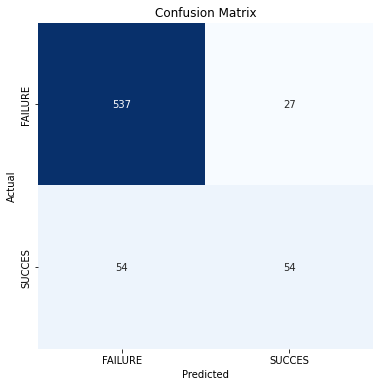

Classification Report:
-------------
               precision    recall  f1-score   support

     FAILURE       0.91      0.95      0.93       564
      SUCCES       0.67      0.50      0.57       108

    accuracy                           0.88       672
   macro avg       0.79      0.73      0.75       672
weighted avg       0.87      0.88      0.87       672



In [ ]:
y_pred=np.array(model.predict(X_test)>=0.5, dtype=np.int)
cm=confusion_matrix(y_test, y_pred)
clr=classification_report(y_test, y_pred, target_names=['FAILURE', 'SUCCES'])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2)+0.5, labels=['FAILURE', 'SUCCES'])
plt.yticks(ticks=np.arange(2)+0.5, labels=['FAILURE', 'SUCCES'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:\n-------------\n', clr)